# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

#### __The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts.__

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time 

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn import set_config
set_config(display="diagram")

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### __No missing data__

In [5]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### __Dropped the 12 duplicate entries__

In [6]:
df.duplicated().sum()

12

In [7]:
df = df.drop_duplicates()
df.duplicated().sum()

0

#### __Lets examine the spread of the output variable__

y
no     0.887337
yes    0.112663
Name: proportion, dtype: float64


<Axes: >

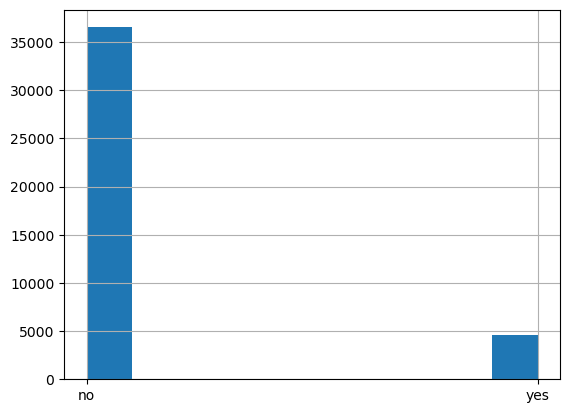

In [8]:
print(df['y'].value_counts(normalize = True))
df['y'].hist()

#### __Significant amount of mismatch with only 11% of success with the direct marketing campaign__

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

#### __Business goal__

- Find a model that can explain success of a contact - if the client subscribes to the deposit.
- Discover what are the main characteristics that affect success.
- Help in a better management of the available resources (Human Effort, phone calls, time)
- Selection of high qualifty and affordable set of potential buying customers.



### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

#### __Lets look at the categorical features__

In [9]:
df_ = df.select_dtypes(exclude=['int', 'float'])
for col in df_.columns:
    print(col, ' => ', df_[col].unique())

job  =>  ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital  =>  ['married' 'single' 'divorced' 'unknown']
education  =>  ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default  =>  ['no' 'unknown' 'yes']
housing  =>  ['no' 'yes' 'unknown']
loan  =>  ['no' 'yes' 'unknown']
contact  =>  ['telephone' 'cellular']
month  =>  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week  =>  ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome  =>  ['nonexistent' 'failure' 'success']
y  =>  ['no' 'yes']


##### __Perform some simple transformations__
- Column `default` : Treat `no` and `unknown` as 0 and `yes` as 1
- Column `housing` : Treat `no` and `unknown` as 0 and `yes` as 1
- Column `loan` : Treat `no` and `unknown` as 0 and `yes` as 1
- Drop column `contact` : It does not seem very interesting as a predictor
- Drop column `poutcome` : This does not seem very interesting as a predictor
- Column `y` : Treat `no` as 0 and `yes` as 1

In [10]:
for col in ['default', 'housing', 'loan']:
    df[col] = df[col].map({'no':0, 'unknown':0, 'yes':1}).apply(pd.to_numeric)

df = df.drop(['contact'], axis=1)
df = df.drop(['poutcome'], axis=1)
df['y'] = df['y'].map({'no':0, 'yes':1}).apply(pd.to_numeric)
df

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,may,mon,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,0,0,0,may,mon,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,may,mon,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,may,mon,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,may,mon,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0,1,0,nov,fri,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,0,0,0,nov,fri,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,0,1,0,nov,fri,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,0,0,0,nov,fri,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1


#### __Lets look at the non-categorical features__


In [11]:
df.agg(['unique']).T 

,unique
age,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 5..."
job,"[housemaid, services, admin., blue-collar, tec..."
marital,"[married, single, divorced, unknown]"
education,"[basic.4y, high.school, basic.6y, basic.9y, pr..."
default,"[0, 1]"
housing,"[0, 1]"
loan,"[0, 1]"
month,"[may, jun, jul, aug, oct, nov, dec, mar, apr, ..."
day_of_week,"[mon, tue, wed, thu, fri]"
duration,"[261, 149, 226, 151, 307, 198, 139, 217, 380, ..."


In [12]:
df['pdays'].value_counts(normalize = True)

pdays
999    0.963207
3      0.010662
6      0.010006
4      0.002866
9      0.001554
2      0.001481
7      0.001457
12     0.001409
10     0.001263
5      0.001117
13     0.000874
11     0.000680
1      0.000631
15     0.000583
14     0.000486
8      0.000437
0      0.000364
16     0.000267
17     0.000194
18     0.000170
22     0.000073
19     0.000073
21     0.000049
25     0.000024
26     0.000024
27     0.000024
20     0.000024
Name: proportion, dtype: float64

#### __Perform simple transformations on non-categorical values__
- Column `pdays` : 96% of the `pdays` column is at 999. We can drop this
- Column `duration` : As specified it highly affects the output target and cannot be known apriori.

In [13]:
df = df.drop(['pdays'], axis=1)
df = df.drop(['duration'], axis=1)
df

,age,job,marital,education,default,housing,loan,month,day_of_week,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,may,mon,1,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,0,0,0,may,mon,1,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,may,mon,1,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,may,mon,1,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,may,mon,1,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0,1,0,nov,fri,1,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,0,0,0,nov,fri,1,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,0,1,0,nov,fri,2,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,0,0,0,nov,fri,1,0,-1.1,94.767,-50.8,1.028,4963.6,1


#### __Create transformers to do 1-hot encoding for the categorical features__

In [14]:
df.agg(['unique']).T 

,unique
age,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 5..."
job,"[housemaid, services, admin., blue-collar, tec..."
marital,"[married, single, divorced, unknown]"
education,"[basic.4y, high.school, basic.6y, basic.9y, pr..."
default,"[0, 1]"
housing,"[0, 1]"
loan,"[0, 1]"
month,"[may, jun, jul, aug, oct, nov, dec, mar, apr, ..."
day_of_week,"[mon, tue, wed, thu, fri]"
campaign,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 19..."


In [15]:
categorical_col = ['job', 'marital', 'education', 'month', 'day_of_week']


##### __The following transformer is not working with DecisionTrees. Hence falling back to using get_dummies()__

```
transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), categorical_col),
                                       remainder = StandardScaler())
```

In [16]:
df = pd.get_dummies(df, prefix=categorical_col, columns=categorical_col, drop_first=True, dtype=int)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis = 1), 
                                                    df['y'],
                                                    random_state=42,
                                                    stratify=df.y)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

##### __A baseline model is one which predicts the majority class for all data points__
Here are the accuracy scores for such a baseline model

In [18]:
y_test.value_counts(normalize=True)

y
0    0.887313
1    0.112687
Name: proportion, dtype: float64

In [19]:
y_train.value_counts(normalize=True)

y
0    0.887345
1    0.112655
Name: proportion, dtype: float64

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [20]:
models = []
trainTimes = []
trainAcc = []
testAcc = []

In [21]:
def fitModel(modelString, modelTuple, X_train, y_train, X_test, y_test):
    pipe = Pipeline([('scaler', StandardScaler()), modelTuple])
    start = time.time()
    pipe.fit(X_train, y_train)
    end = time.time()
    timeDiff = end - start
    models.append(modelString)
    trainTimes.append(timeDiff)
    trainAcc.append(pipe.score(X_train, y_train))
    testAcc.append(pipe.score(X_test, y_test))
    return pipe

In [22]:
# Create a pipeline with the 'transformer' and 'extractor' from before
lgr_pipe = fitModel('Logistic Regression',
                    ('lgr', LogisticRegression(max_iter=1000, random_state=42)),
                    X_train, y_train, X_test, y_test)

### Problem 9: Score the Model

What is the accuracy of your model?

In [23]:
print(f'Accuracy of our model = {lgr_pipe.score(X_test, y_test)}')

Accuracy of our model = 0.889061589275306


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [24]:
# KNN Model
knn_pipe = fitModel('KNN',
                    ('knn', KNeighborsClassifier()),
                    X_train, y_train, X_test, y_test)

In [25]:
# Decision Tree
dt_pipe = fitModel('Decision Tree', 
                   ('dt', DecisionTreeClassifier()), 
                   X_train, y_train, X_test, y_test)

In [26]:
# SVM 
svm_pipe = fitModel('SVM',
                    ('svc', SVC()),
                    X_train, y_train, X_test, y_test)

In [27]:
res_dict = {'Model': models,
           'Train Time': trainTimes,
           'Train Accuracy': trainAcc,
           'Test Accuracy': testAcc}
results_df = pd.DataFrame(res_dict).set_index('Model')
results_df

,Train Time,Train Accuracy,Test Accuracy
Model,,,
Logistic Regression,0.294155,0.890551,0.889062
KNN,0.019104,0.908814,0.884399
Decision Tree,0.146294,0.994495,0.839227
SVM,31.592249,0.906386,0.892656


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

##### __Feature Engineering__
- One way to do feature engineering is to use SelectFromModel() with LogisticRegression and L1 regularization to affect 
  weights for features. This can be incorporated into the pipeline
  
- The correlation matrix can also give us a good way to identify features that really matter to the output variable.

##### __Hyper-parameter tuning__
As part of grid-search, we need to optimize on reducing both FalsePositives (FP) and FalseNegatives (FN).

- __Cost of FP__: This could be the marketing spend wasted on targeting customers who dont take the product
- __Cost of FN__: This could be the potential revenue lost from missing out on customers who would take the product.

The above requires that we tradeoff between __precision-recall__. The alternate way this can be achieved is by comparing area under the ROC curve. Hence the `roc_auc` option of scoring is used in GridSearch.

In [28]:
correlation_matrix = df.corr()
correlation_matrix.head()

,age,default,housing,loan,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
age,1.000000,0.001892,-0.001290,-0.007189,0.004622,0.024379,-0.000242,0.001009,0.129075,0.010852,...,-0.009525,0.008394,-0.067496,0.030071,0.052506,0.040900,0.019035,-0.021347,0.019070,-0.023664
default,0.001892,1.000000,-0.003257,-0.003610,-0.003804,0.002765,0.004445,-0.003142,0.004494,0.005274,...,-0.003287,-0.000990,-0.006050,0.006664,-0.001136,-0.001011,-0.004357,-0.004392,0.017268,-0.004235
housing,-0.001290,-0.003257,1.000000,0.056634,-0.010861,0.020428,-0.059913,-0.081992,-0.034319,-0.058919,...,-0.057703,0.013164,-0.023106,0.033799,0.002745,0.006406,0.012463,0.012821,-0.011266,0.001565
loan,-0.007189,-0.003610,0.056634,1.000000,0.005251,-0.002187,0.001183,-0.005985,-0.013652,-0.000488,...,-0.009678,-0.004053,0.000289,-0.003646,-0.009728,-0.002602,0.006920,-0.001112,-0.009706,-0.002252
campaign,0.004622,-0.003804,-0.010861,0.005251,1.000000,-0.079182,0.150786,0.127826,-0.013657,0.135169,...,0.070108,-0.015256,-0.032780,-0.079059,-0.049070,-0.033966,0.014401,0.005215,-0.025066,-0.021141


__Plot the correlation heatmap__

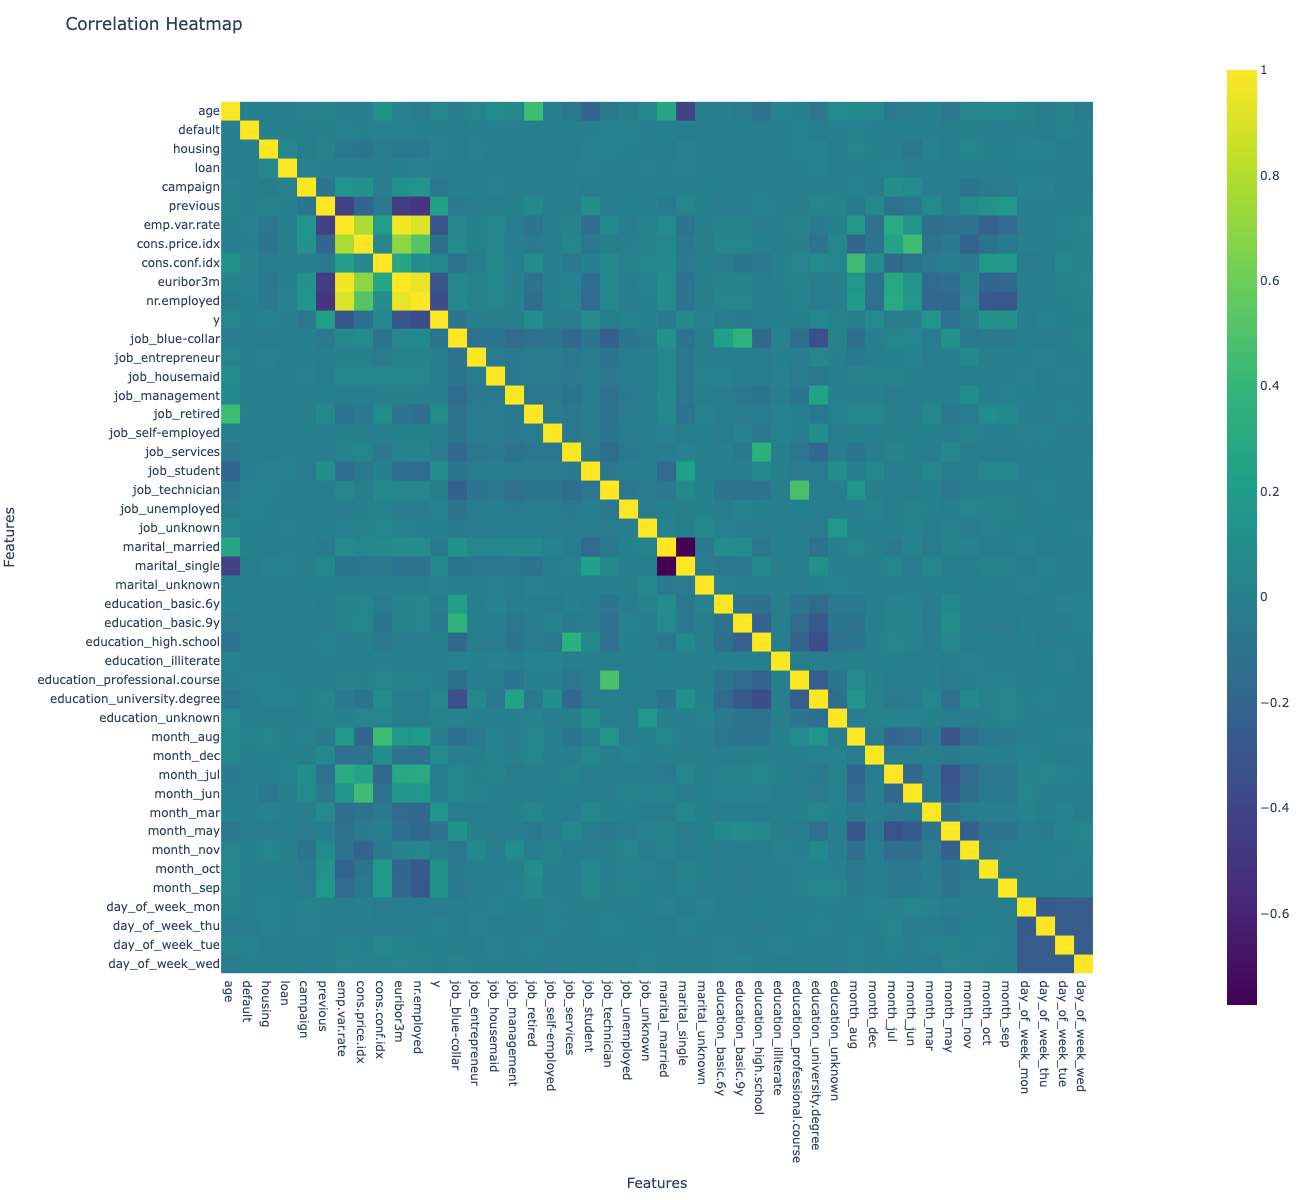

In [44]:
import plotly.express as px


# Create a heatmap figure using Plotly
fig = px.imshow(correlation_matrix, color_continuous_scale='viridis')

# Set axis labels and title
fig.update_xaxes(title_text='Features')
fig.update_yaxes(title_text='Features')
fig.update_layout(
    title='Correlation Heatmap',
    height=1200,  # Set the height of the figure
    width=1200    # Set the width of the figure
)

# Save the plot as an HTML file
fig.write_html('correlation_heatmap.html')

# Display the plot (optional)
fig.show()
fig.write_image('images/heatmap.png')

__Lets look at the features that are highly correlated with `y`__

In [31]:
sorted_corr_matrix_protocolName = correlation_matrix['y'].abs().sort_values(ascending=False)
sorted_corr_matrix_protocolName

y                                1.000000
nr.employed                      0.354669
euribor3m                        0.307740
emp.var.rate                     0.298289
previous                         0.230202
month_mar                        0.144027
month_oct                        0.137538
cons.price.idx                   0.136134
month_sep                        0.126079
month_may                        0.108278
job_student                      0.093962
job_retired                      0.092364
month_dec                        0.079311
job_blue-collar                  0.074431
campaign                         0.066361
cons.conf.idx                    0.054802
marital_single                   0.054209
education_university.degree      0.050267
education_basic.9y               0.045152
marital_married                  0.043476
month_jul                        0.032344
job_services                     0.032262
age                              0.030381
education_basic.6y               0

##### __Create a Feature extractor which also uses LogisticRegression__

`extractor = SelectFromModel(LogisticRegression(penalty='l1', solver = 'liblinear' ,random_state = 42))`

__NOTE__: For now the above extractor is not being used as it significantly increases the time of execution for the various classifiers while doing GridSearch

In [32]:
grid_models = []
grid_trainTimes = []
grid_trainAcc = []
grid_testAcc = []

In [33]:
## Display Confusion Matrix
def displayConfusionMatrix(title, preds, y_test):
    confusion_mat = confusion_matrix(y_test, preds, labels=[True, False])
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat)
    disp.plot()
    acc = accuracy_score(y_test, preds)
    
    class_report = classification_report(y_test, preds)
    print(f"\nClassification Report: {title}")
    print(class_report)
    plt.show()
    
def displayStuff(title, model, X_test, y_test):
    preds = model.predict(X_test)
    displayConfusionMatrix(title, preds, y_test)

In [34]:
## Create a pipeline with the passed in model tuple and fit it. 
## Measure the time taken to fit and test/train accuracies.
## Display confusion matrix
def gridSearchFitModel(modelString, modelParams, modelTuple, X_train, y_train, X_test, y_test):
    pipe = Pipeline([('scaler', StandardScaler()),
                     #('selector', extractor),
                     modelTuple])

    grid = GridSearchCV(pipe, param_grid=modelParams, scoring='roc_auc')
    start = time.time()
    grid.fit(X_train, y_train)
    end = time.time()
    timeDiff = end - start
    grid_models.append(modelString)
    grid_trainTimes.append(timeDiff)
    grid_trainAcc.append(grid.score(X_train, y_train))
    grid_testAcc.append(grid.score(X_test, y_test))
    displayStuff(modelString, grid, X_test, y_test)
    return grid


Classification Report: KNN
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      9134
           1       0.59      0.10      0.17      1160

    accuracy                           0.89     10294
   macro avg       0.74      0.55      0.56     10294
weighted avg       0.86      0.89      0.86     10294



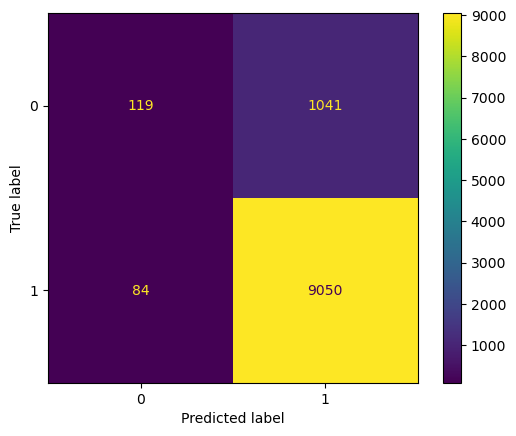

In [35]:
param_grid_knn = {
    'knn__n_neighbors': [5, 10, 20, 50],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}
knn_grid = gridSearchFitModel('KNN', param_grid_knn, ('knn', KNeighborsClassifier()), X_train, y_train, X_test, y_test)


Classification Report: DecisionTree
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9134
           1       0.56      0.24      0.34      1160

    accuracy                           0.89     10294
   macro avg       0.74      0.61      0.64     10294
weighted avg       0.87      0.89      0.87     10294



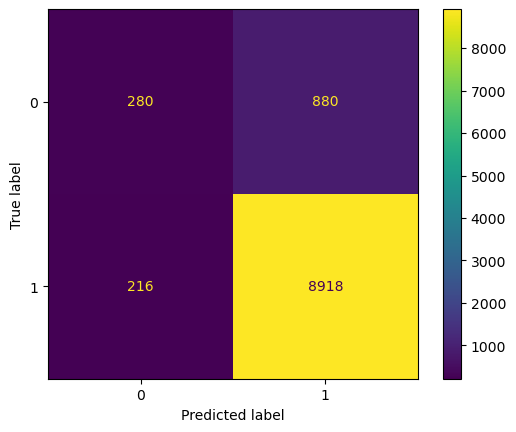

In [36]:
param_grid_dt = {
    'dt__criterion': ['gini', 'entropy', 'log_loss'],
    'dt__max_depth': [2, 5, 10, 20, 30, None],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4],
    'dt__min_impurity_decrease': [0.0, 0.01, 0.02, 0.03, 0.05]
}
dt_grid = gridSearchFitModel('DecisionTree', param_grid_dt, ('dt', DecisionTreeClassifier()), X_train, y_train, X_test, y_test)

/Users/venkit/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


45 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/venkit/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/venkit/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/venkit/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line


Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9134
           1       0.53      0.14      0.22      1160

    accuracy                           0.89     10294
   macro avg       0.72      0.56      0.58     10294
weighted avg       0.86      0.89      0.86     10294



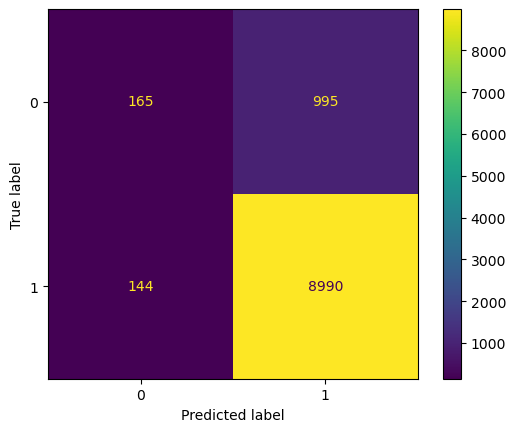

In [37]:
param_grid_logistic = {
    'lgt__C': [0.1, 1, 10],       
    'lgt__penalty': ['l1', 'l2'],  
    'lgt__solver': ['lbfgs', 'liblinear'],
    'lgt__max_iter': [100, 1000, 2000],
}
lg_grid = gridSearchFitModel('Logistic Regression', param_grid_logistic, ('lgt', LogisticRegression()), X_train, y_train, X_test, y_test)


Classification Report: SVM
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9134
           1       0.57      0.18      0.28      1160

    accuracy                           0.89     10294
   macro avg       0.74      0.58      0.61     10294
weighted avg       0.87      0.89      0.87     10294



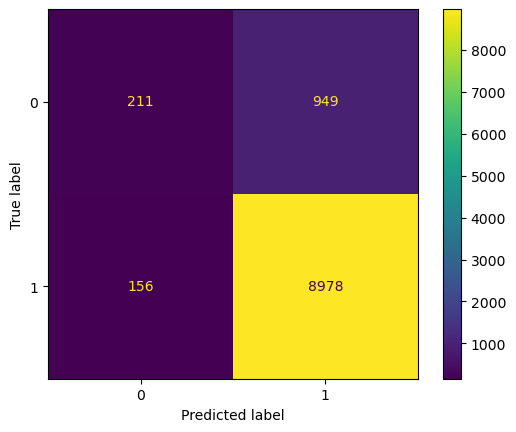

In [38]:
params_grid_svc = {'svc__kernel': ['rbf', 'sigmoid'],
                   'svc__gamma': ['scale', 'auto']}
svm_grid = gridSearchFitModel('SVM', params_grid_svc, ('svc', SVC()), X_train, y_train, X_test, y_test)

#### __ROC Curves__

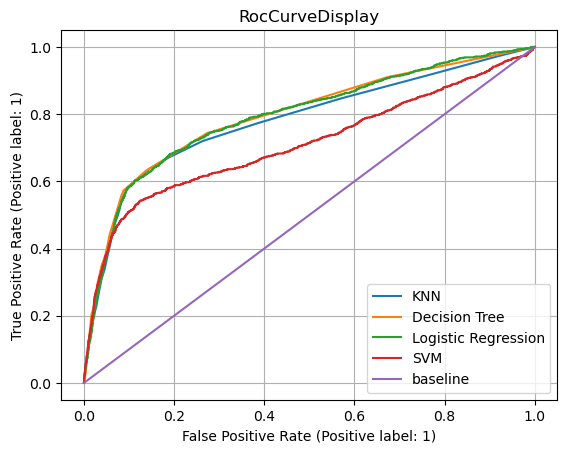

In [39]:
from sklearn.metrics import RocCurveDisplay
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(knn_grid, X_test, y_test, ax = ax, label = 'KNN')
RocCurveDisplay.from_estimator(dt_grid, X_test, y_test, ax = ax, label = 'Decision Tree')
RocCurveDisplay.from_estimator(lg_grid, X_test, y_test, ax = ax, label = 'Logistic Regression')
RocCurveDisplay.from_estimator(svm_grid, X_test, y_test, ax = ax, label = 'SVM')

plt.grid()
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
plt.title('RocCurveDisplay')
plt.legend();

In [40]:
grid_dict = {'Model': grid_models,
             'GridSearch+Train Time': grid_trainTimes,
             'Train Accuracy': grid_trainAcc,
             'Test Accuracy': grid_testAcc}
grid_df = pd.DataFrame(grid_dict).set_index('Model')
grid_df

,GridSearch+Train Time,Train Accuracy,Test Accuracy
Model,,,
KNN,30.435293,0.822454,0.781147
DecisionTree,147.479297,0.783091,0.796397
Logistic Regression,124.186723,0.780910,0.793920
SVM,309.041585,0.871272,0.710263


#### __Model Comparison__

Looking at the precision/recall tradeoff (using the area under the ROC curve)

- Both `Decision Tree` and `Logistic Regression` perform quite well.
- The time taken to GridSearch and train for `Logistic Regression` was lower
- `KNN` did really great in terms of GridSearch+Train time and is not too bad in terms of `area under the curve`
- `SVM` did poorly in all respects

##### Questions